In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats 
import scipy
from scipy.special import factorial
import math
from cleanData import getCleanTripData, getCleanFareData, getTripData, getFareData
from identifySuburbs import TaxiZone, Point, process_zones, haversine_distance, manhattan_distance

In [19]:
#trip_data_4.csv
#trip_fare_4.csv
trip = getTripData('./data/trip_data_4.csv')
trip = getCleanTripData(trip)
fare = getFareData('./data/trip_fare_4.csv')
fare = getCleanFareData(fare)

In [20]:
fare['pickup_datetime'] = pd.to_datetime(fare.pickup_datetime) 
fare['pickup_day'] = fare['pickup_datetime'].dt.day
fare['pickup_hour'] = fare['pickup_datetime'].dt.hour
fare['pickup_weekday'] = fare['pickup_datetime'].dt.weekday
fare['pickup_weekhour'] = fare['pickup_datetime'].dt.weekday*24 + fare['pickup_hour']

In [21]:
fare.head()


,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,pickup_hour,pickup_weekday,pickup_weekhour
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00,4,18,3,90
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80,5,7,4,103
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60,4,17,3,89
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95,4,18,3,90
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20,4,20,3,92


Text(0.5,1,'Total pickups at each hour')

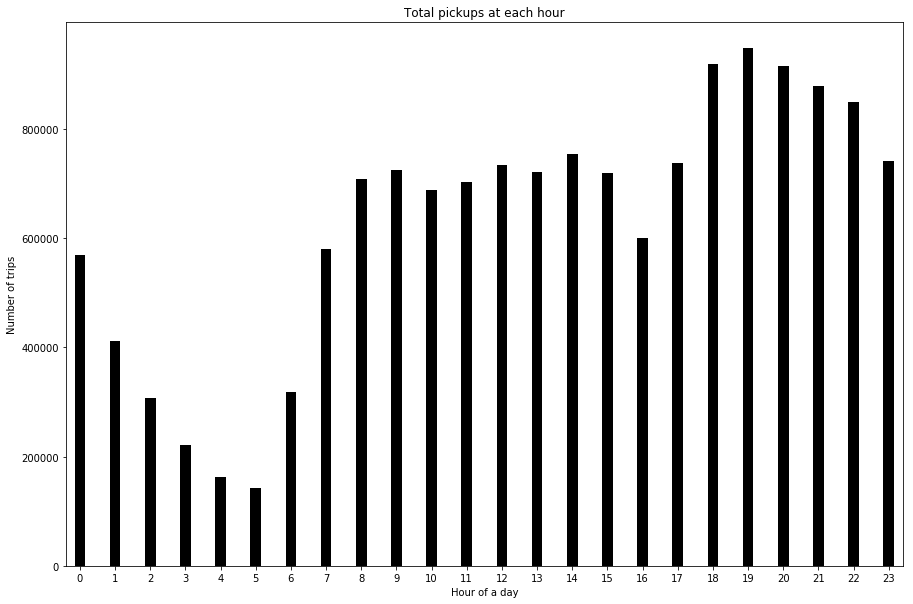

In [22]:
plt.figure(figsize=(15, 10)) 
fare.pickup_hour.value_counts(sort=False).plot(kind='bar', color='black', align='center',width=0.3)
plt.xlabel("Hour of a day")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of trips")
plt.title("Total pickups at each hour")

Text(0.5,1,'Total pickups at each hour of the week')

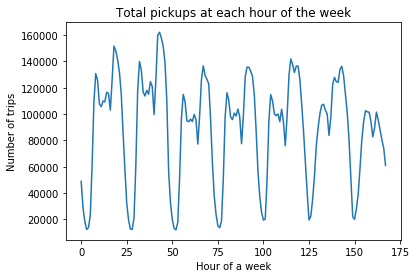

In [23]:
wh_business = fare.pickup_weekhour.value_counts(sort=False)
values = []
keys = []
for i in range(len(wh_business)):
    keys.append(i)
    values.append(wh_business[i])
plt.figure(figsize=(15, 10)) 
fig, ax = plt.subplots()
plt.plot(keys, values)
plt.xlabel("Hour of a week")
plt.ylabel("Number of trips")
plt.title("Total pickups at each hour of the week")
#Deceiving data as there are more mondays/tuesdays

Text(0.5,1,'Total pickups at each hour of the month')

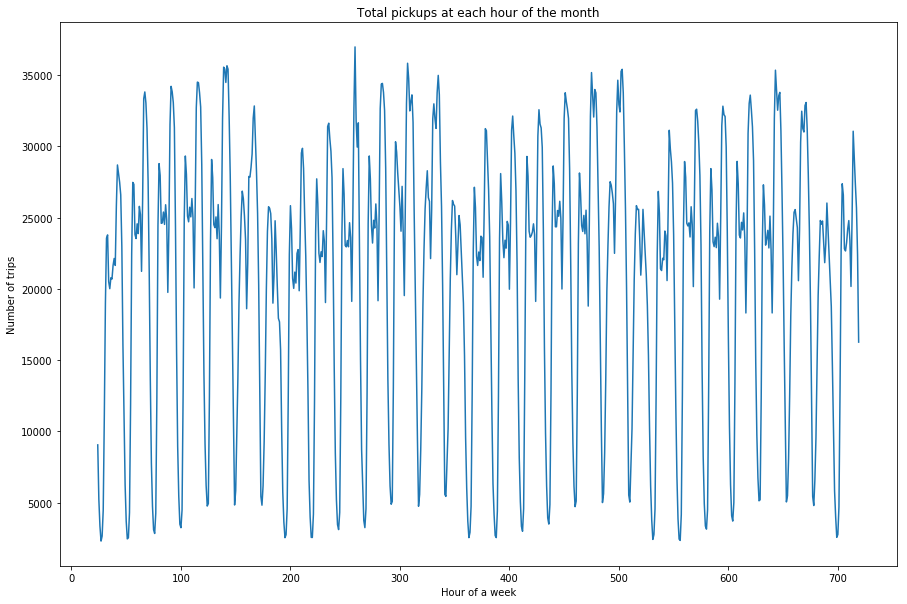

In [24]:
fare['pickup_monthhour'] = fare['pickup_day']*24 + fare['pickup_hour']
mh_business = fare.pickup_monthhour.value_counts(sort=False)
values = []
keys = []
for i in range(24,len(mh_business)):
    keys.append(i) 
    values.append(mh_business[i])
plt.figure(figsize=(15, 10))
plt.plot(keys, values)
plt.xlabel("Hour of a week")
plt.ylabel("Number of trips")
plt.title("Total pickups at each hour of the month")

Text(0.5,1,'Total pickups of second week')

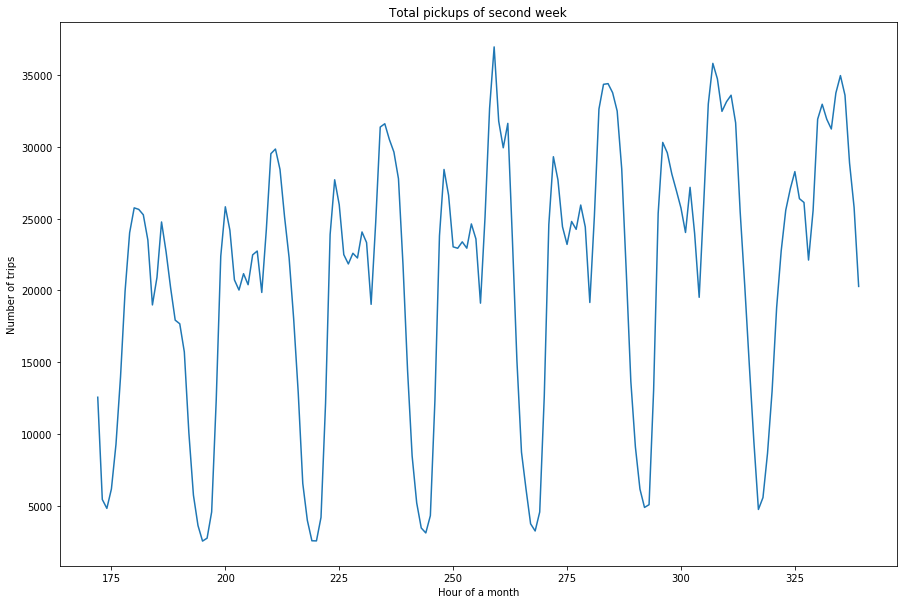

In [25]:
fare['pickup_monthhour'] = fare['pickup_day']*24 + fare['pickup_hour']
mh_business = fare.pickup_monthhour.value_counts(sort=False)
values = []
keys = []
for i in range(24,len(mh_business)):
    keys.append(i) 
    values.append(mh_business[i])
#So April 2013 starts on 
keys = keys[168-20:168+168-20]
values = values[168-20:168+168-20]
plt.figure(figsize=(15, 10))
plt.plot(keys, values)
plt.xlabel("Hour of a month")
plt.ylabel("Number of trips")
plt.title("Total pickups of second week")

Text(0.5,1,'Total pickups of second week')

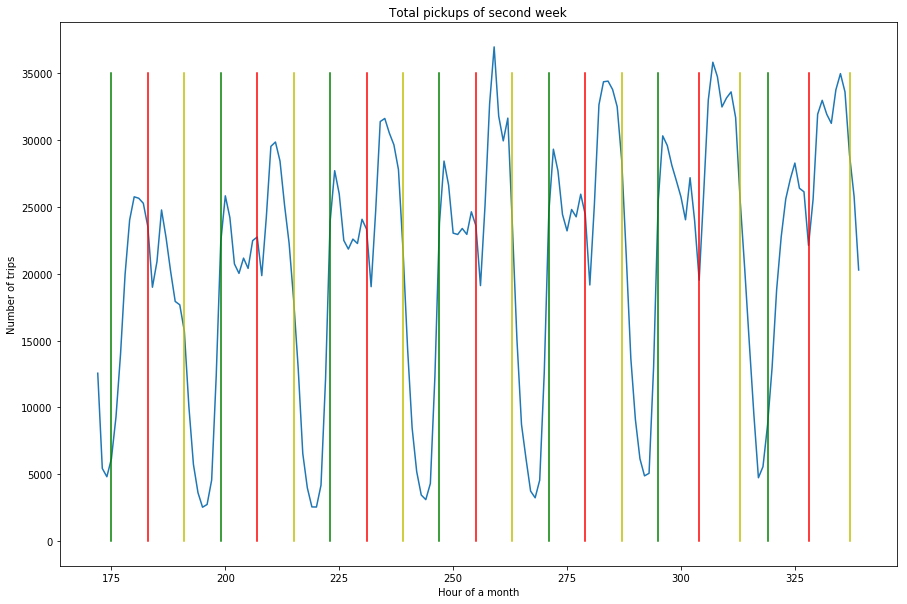

In [34]:
fare['pickup_monthhour'] = fare['pickup_day']*24 + fare['pickup_hour']
mh_business = fare.pickup_monthhour.value_counts(sort=False)
values = []
keys = []
for i in range(24,len(mh_business)):
    keys.append(i) 
    values.append(mh_business[i])
    
keys = keys[168-20:168+168-20]
values = values[168-20:168+168-20]
plt.figure(figsize=(15, 10))
plt.plot(keys, values)
start = 3
shift = 8
# This is very manual solution and we could certainly solve it computationally.
# But it represents the idea and I there was no time to implement it properly.
plt.plot([168-20+24+start,168-20+24+start],[0, 35000], c='g')
plt.plot([168-20+24+start+shift,168-20+24+start+shift],[0, 35000], c='r')
plt.plot([168-20+24+start+shift*2,168-20+24+start+shift*2],[0, 35000], c='y')

plt.plot([168-20+24*2+start,168-20+24*2+start],[0, 35000], c='g')
plt.plot([168-20+24*2+start+shift,168-20+24*2+start+shift],[0, 35000], c='r')
plt.plot([168-20+24*2+start+shift*2,168-20+24*2+start+shift*2],[0, 35000], c='y')

plt.plot([168-20+24*3+start,168-20+24*3+start],[0, 35000], c='g')
plt.plot([168-20+24*3+start+shift,168-20+24*3+start+shift],[0, 35000], c='r')
plt.plot([168-20+24*3+start+shift*2,168-20+24*3+start+shift*2],[0, 35000], c='y')

plt.plot([168-20+24*4+start,168-20+24*4+start],[0, 35000], c='g')
plt.plot([168-20+24*4+start+shift,168-20+24*4+start+shift],[0, 35000], c='r')
plt.plot([168-20+24*4+start+shift*2,168-20+24*4+start+shift*2],[0, 35000], c='y')

plt.plot([168-20+24*5+start,168-20+24*5+start],[0, 35000], c='g')
plt.plot([168-20+24*5+start+shift,168-20+24*5+start+shift],[0, 35000], c='r')
plt.plot([168-20+24*5+start+shift*2,168-20+24*5+start+shift*2],[0, 35000], c='y')

shift = 9
plt.plot([168-20+24*6+start,168-20+24*6+start],[0, 35000], c='g')
plt.plot([168-20+24*6+start+shift,168-20+24*6+start+shift],[0, 35000], c='r')
plt.plot([168-20+24*6+start+shift*2,168-20+24*6+start+shift*2],[0, 35000], c='y')

plt.plot([168-20+24*7+start,168-20+24*7+start],[0, 35000], c='g')
plt.plot([168-20+24*7+start+shift,168-20+24*7+start+shift],[0, 35000], c='r')
plt.plot([168-20+24*7+start+shift*2,168-20+24*7+start+shift*2],[0, 35000], c='y')

plt.xlabel("Hour of a month")
plt.ylabel("Number of trips")
plt.title("Total pickups of second week")